# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [3]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [4]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Understanding the structure of the data

In [6]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
path = "/content/drive/MyDrive/Project #1- FoodHub/foodhub_order.csv"
df = pd.read_csv(path)

In [8]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
print("There are", df.shape[0], 'rows and', df.shape[1], "columns.")

There are 1898 rows and 9 columns.


#### Observations:There are 1898 rows and 9 columns in this dataset.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: The data types of the columns in this dataset are float64(1), int64(4), object(4).


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations: There are 0 missing values in the dataset therefor no treatment is required.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
df.describe(include= "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


Observations: Minimum = 20 mins, Average = 27.37 mins, Max = 35 mins. There are also 736 orders rated as "Not given".


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
df['rating'] = df['rating'].replace(['Not given'],np.nan)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB



#### Observations: There were 736 orders that were not given that have now been replaced with NaN, leaving 1162 orders that have received a rating.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


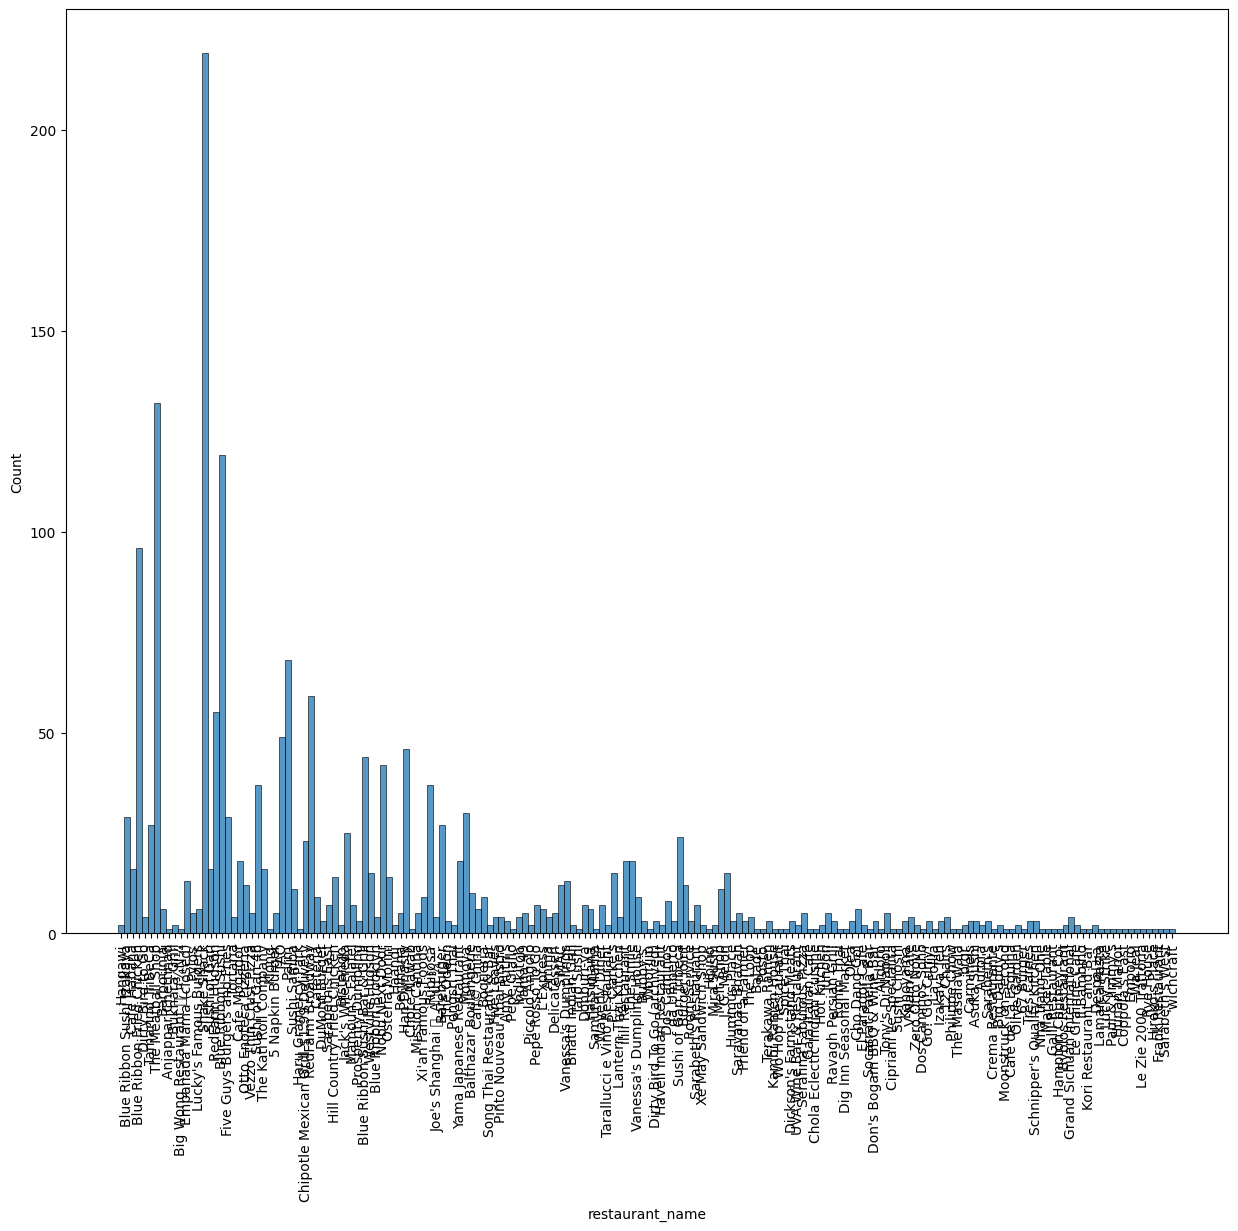

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


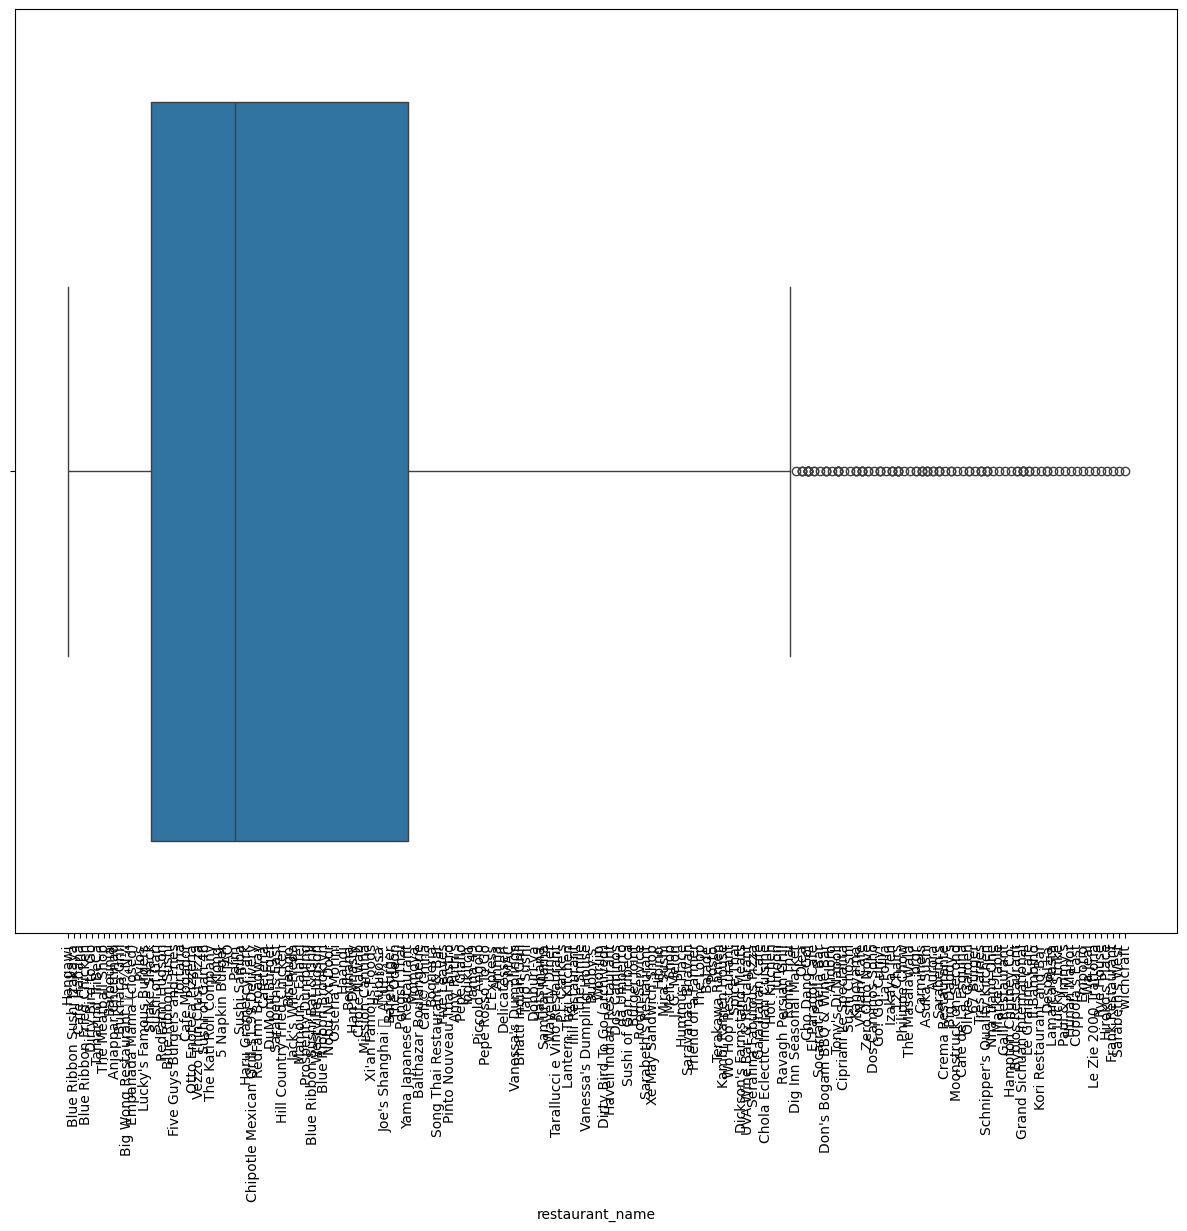

In [ ]:
plt.figure(figsize=(15, 12))
sns.histplot(data=df,x='restaurant_name')
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(15, 12))
sns.boxplot(data=df,x='restaurant_name')
plt.xticks(rotation=90)
plt.show()

"Restaurant name" column has too many different values to be displayed in a readable manner by histplot or boxplot graph visualization

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


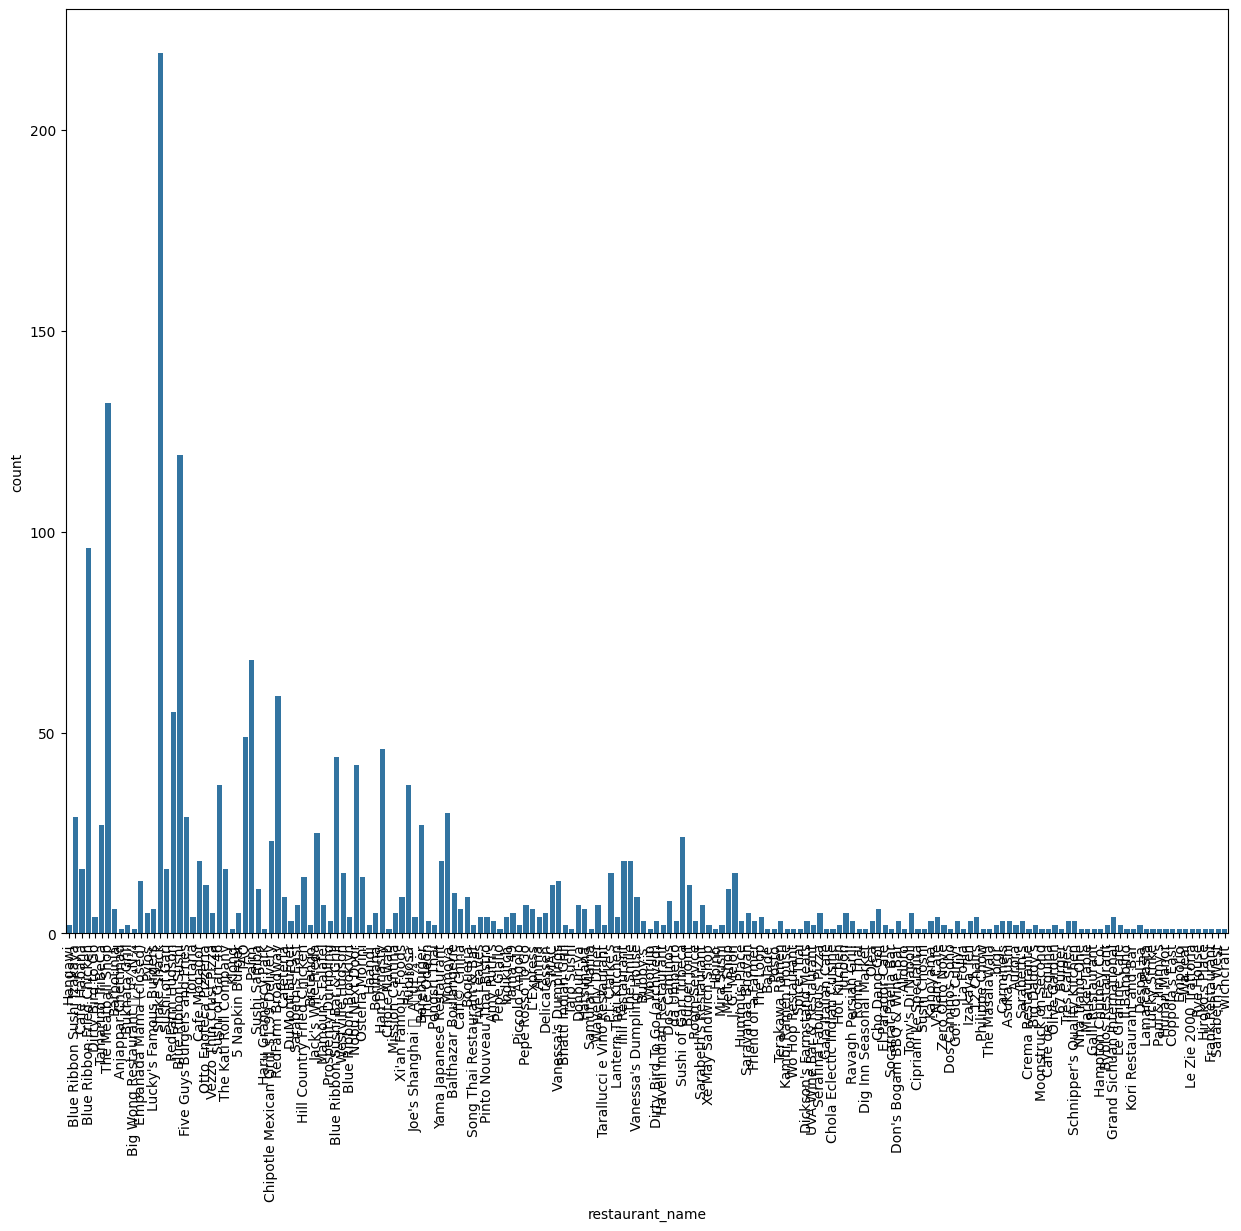

In [ ]:
plt.figure(figsize=(15, 12))
sns.countplot(data=df,x='restaurant_name')
plt.xticks(rotation=90)
plt.show()

"Restaurant name" column has too many different values to be displayed in a readable manner by countplot graph visualization as well.

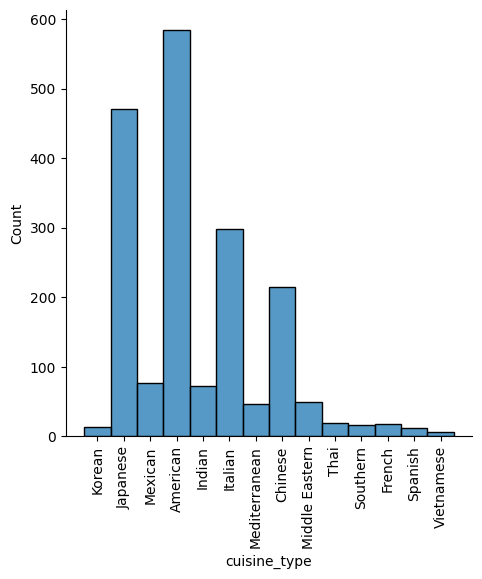

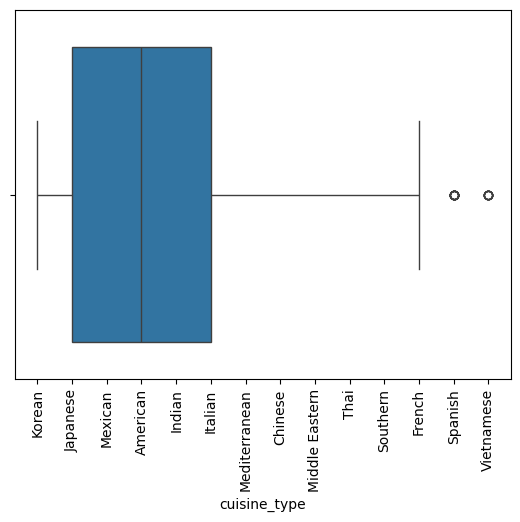

In [ ]:
sns.displot(data=df,x='cuisine_type')
plt.xticks(rotation=90)
plt.show()
sns.boxplot(data=df,x='cuisine_type')
plt.xticks(rotation=90)
plt.show()

The following 6 cuisine types are the most commonly placed orders:

1.   American
2.   Japanese
3. Chinese
4. Italian
5. Mexican
6. Indian

Spanish and Vietnamese cuisines are outliers

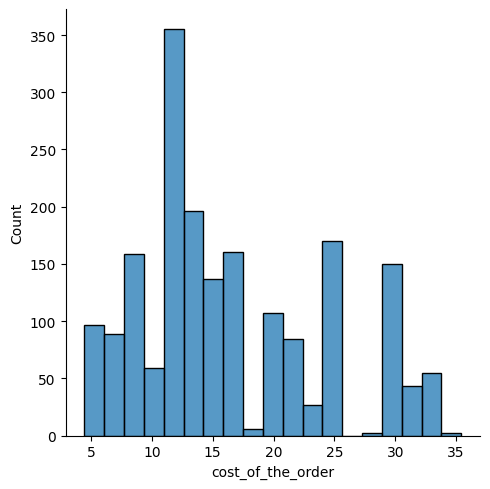

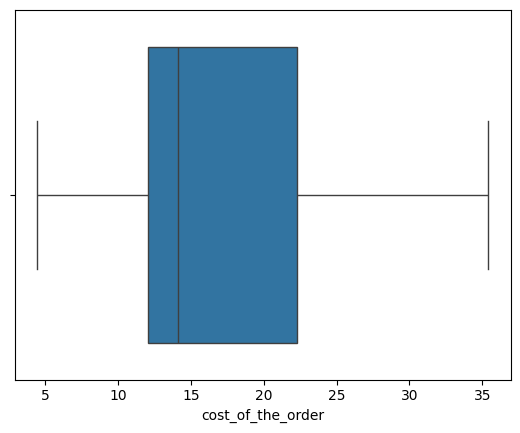

In [ ]:
sns.displot(data=df,x='cost_of_the_order')
plt.show()
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()

50% of the food orders cost between 11 and 22.50. Around 550 total of those (~350 + ~200) orders cost between $11-13; around a total of 550 orders fall in this price range.









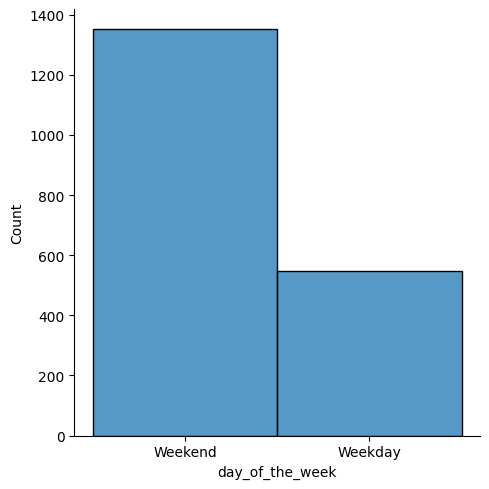

In [ ]:
sns.displot(data=df,x='day_of_the_week')
plt.show()


Weekend delivery dates are more than double the amount of weekday deliveries.

1.   Weekend = almost 1400
2.   Weekday = almost 600




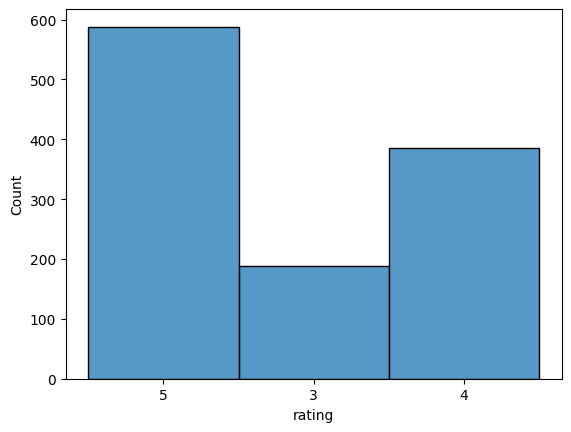

In [ ]:
sns.histplot(data=df,x='rating')
plt.show()


**PREVIOUS TO REMOVING "NOT GIVEN" RATINGS: The majority of restaurants have received no rating at just over 700.** The next highest rating is 5 at just under 600. Rating of 4 is at 400 and 3 is lowest count at just under 200.

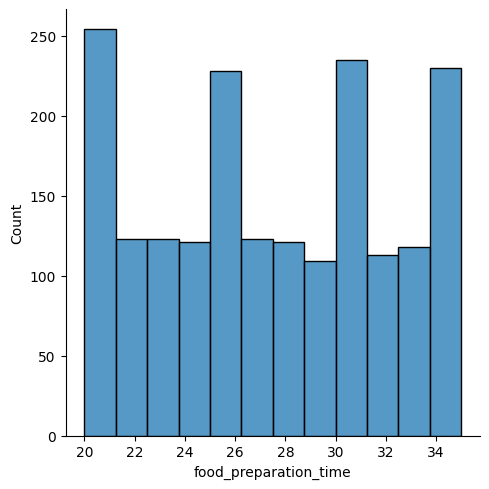

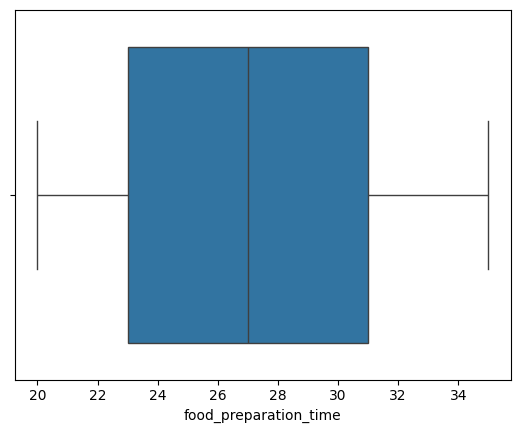

In [ ]:
sns.displot(data=df,x='food_preparation_time')
plt.show()
sns.boxplot(data=df,x='food_preparation_time')
plt.show()

50% of orders take between 23 to 31 minutes to prepare. 20-21 minutes preparation time is the most common amount with 30-31 minutes being the second most common.

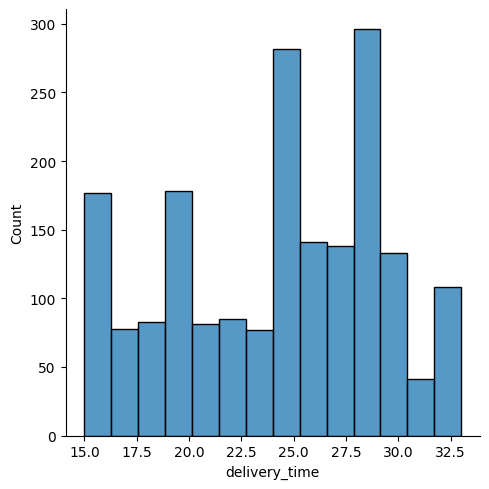

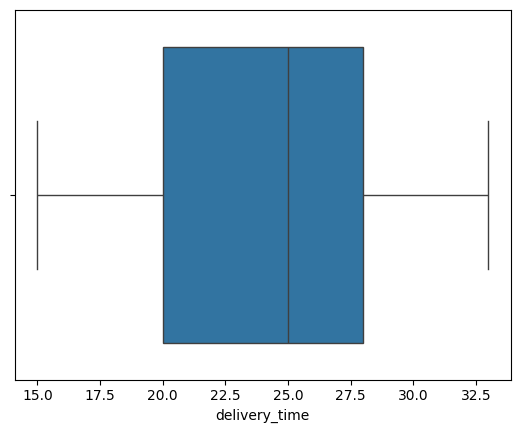

In [ ]:
sns.displot(data=df,x='delivery_time')
plt.show()
sns.boxplot(data=df,x='delivery_time')
plt.show()

50% of all orders have a delivery time between 20 - 28 minutes. 28 to 29 minutes is most common at almost 300 orders and 24 - 25 minutes is second most common at around 275 orders.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
restaurant_counts = df['restaurant_name'].value_counts()
top_5_restaurants = restaurant_counts.head(5)
print(top_5_restaurants)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


Shake Shack is the top restaurant with 219 orders and Parm is the lowest of the top 5 restaurants with 68 orders.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
weekend_data = df[df['day_of_the_week'].isin(['Weekend'])]
cuisine_counts = weekend_data['cuisine_type'].value_counts()
most_popular_cuisine = cuisine_counts.idxmax()
print(f"The most popular cuisine on weekends is: {most_popular_cuisine}")



The most popular cuisine on weekends is: American


⏰#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
expensive_orders = df[df['cost_of_the_order'] > 20]
percentage_expensive_orders = (len(expensive_orders) / len(df)) * 100
print(f"The percentage of orders costing more than $20 is: {percentage_expensive_orders:.2f}%")


The percentage of orders costing more than $20 is: 29.24%



#### Observations:The percentage of orders costing more than $20 is: 29.24%


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
df.describe(include= "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Observations: The mean order delivery time is 24.161749 minutes or 24 minutes rounded to the nearest minute.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
customer_orders = df.groupby('customer_id').size().reset_index(name='order_count')
top_3_customers = customer_orders.nlargest(3, 'order_count')
print(top_3_customers)

     customer_id  order_count
116        52832           13
84         47440           10
333        83287            9


#### Observations: The top three customer IDs and the number of their orders placed are below:


1.   Customer 52832 - 13 orders
2.   Customer 47440 - 10 orders
3. Customer 83287 - 9 orders




### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


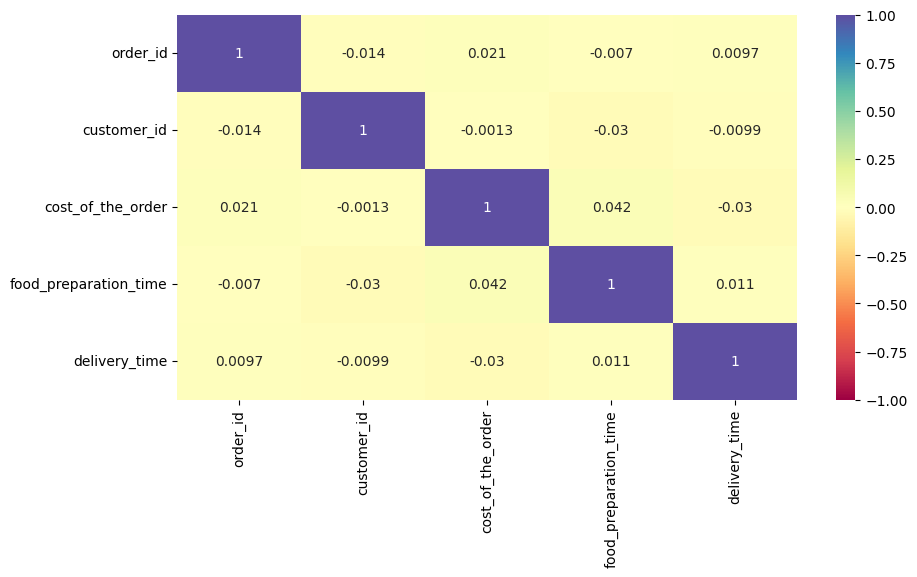

In [ ]:
plt.figure(figsize=(10,5))
numerical_data = df.select_dtypes(include=['number'])
sns.heatmap(numerical_data.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

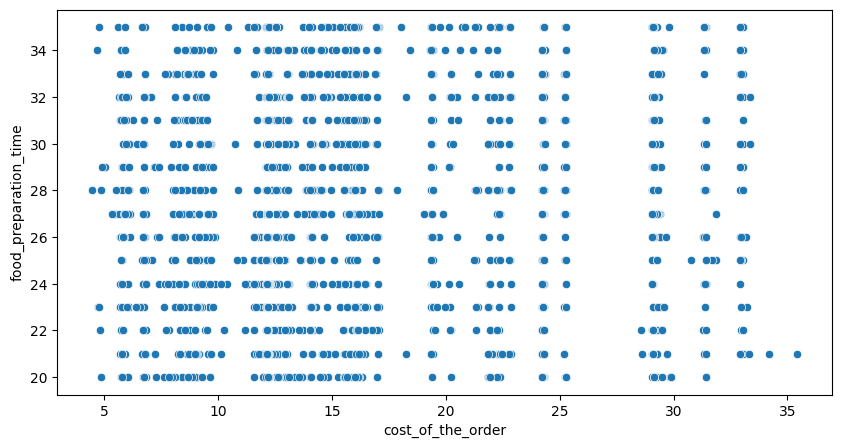

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df,x='cost_of_the_order',y='food_preparation_time')
plt.show()

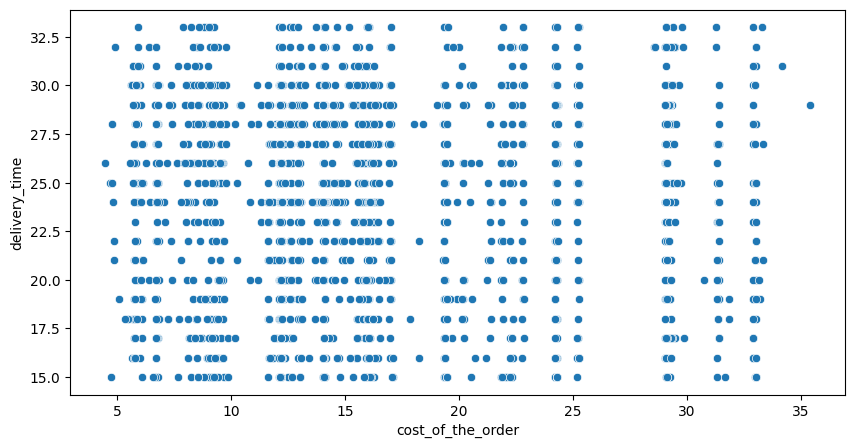

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df,x='cost_of_the_order',y='delivery_time')
plt.show()

In [ ]:
df[['cost_of_the_order','food_preparation_time']].corr()

,cost_of_the_order,food_preparation_time
cost_of_the_order,1.000000,0.041527
food_preparation_time,0.041527,1.000000


In [ ]:
df[['cost_of_the_order','delivery_time']].corr()

,cost_of_the_order,delivery_time
cost_of_the_order,1.000000,-0.029949
delivery_time,-0.029949,1.000000


In [ ]:
df[['delivery_time','food_preparation_time']].corr()

,delivery_time,food_preparation_time
delivery_time,1.000000,0.011094
food_preparation_time,0.011094,1.000000


Observations: The multivariate analysis of the correlation between preparation time, delivery time, and cost of the order have no discernable correlation. This conclusion has been reaffirmed by the .corr command.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]



1.   Find restaurants with rating counts > 50 **- group by restaurant name? ->remove restaurants with less than 50 count? **
2.   Find those restaurants' average rating - .mean?
3.   Eliminate restaurants with average less than 4



In [ ]:
df.value_counts('rating' )


rating
5    588
4    386
3    188
Name: count, dtype: int64

In [ ]:
new_data = df[df['rating'].notnull()]
new_data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30


In [ ]:
new_data.to_csv('/content/drive/MyDrive/Python Course/FoodHub_non_null_rating.csv',index=False)

In [ ]:
new_data.groupby(['restaurant_name'])[['rating']].sum

<bound method GroupBy.sum of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7df4d9d81900>>

In [ ]:
filtered_data = new_data.groupby('restaurant_name')['rating'].sum().reset_index()
filtered_data = filtered_data[filtered_data['rating'] > 50]

TypeError: '>' not supported between instances of 'str' and 'int'

In [ ]:
print(filtered_data)

                           restaurant_name  rating
11                              Bareburger      69
16               Blue Ribbon Fried Chicken     277
17                       Blue Ribbon Sushi     308
18           Blue Ribbon Sushi Bar & Grill     101
19               Blue Ribbon Sushi Izakaya      78
26                            Cafe Mogador      54
31   Chipotle Mexican Grill $1.99 Delivery      63
49             Five Guys Burgers and Fries      82
57                             Han Dynasty     102
68                             J. G. Melon      53
69                       Jack's Wife Freda      82
85                                  Momoya      94
88                          Nobu Next Door     100
94                                    Parm     161
104                       RedFarm Broadway     174
105                         RedFarm Hudson     142
106                               Rubirosa      99
117                            Shake Shack     569
123                       Sushi

<ipython-input-84-027eba43c7ae>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', True)` for the same effect.

  sns.lineplot(data=filtered_data, x='restaurant_name', y='rating', ci=True, estimator='sum')


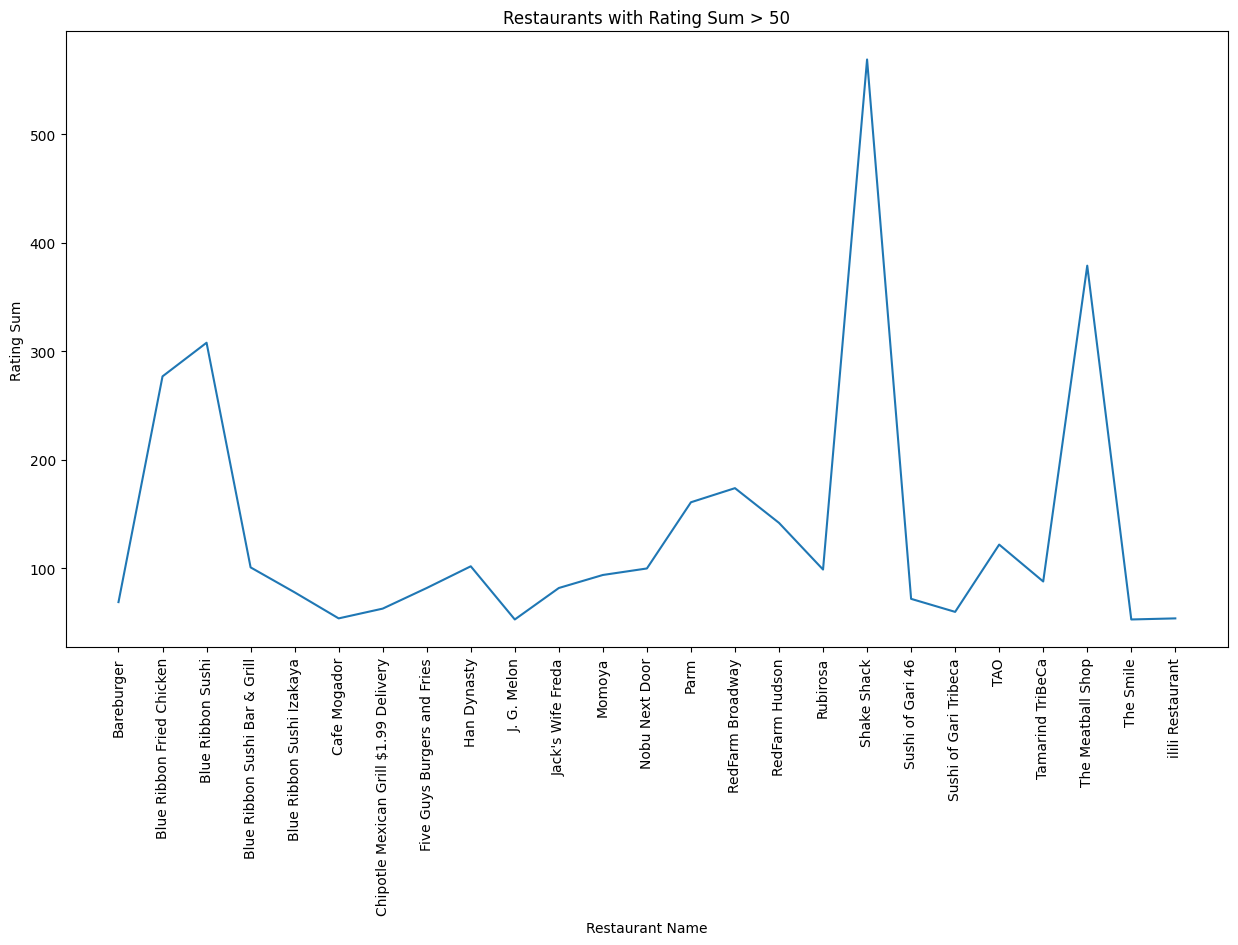

In [ ]:
plt.figure(figsize=(15, 8))
sns.lineplot(data=filtered_data, x='restaurant_name', y='rating', ci=True, estimator='sum')
plt.xticks(rotation=90)
plt.title('Restaurants with Rating Sum > 50')
plt.xlabel('Restaurant Name')
plt.ylabel('Rating Sum')
plt.show()

In [ ]:
new_data.groupby(['restaurant_name'])['rating'].mean()

restaurant_name
'wichcraft                          5.0
12 Chairs                          22.5
5 Napkin Burger                    17.5
67 Burger                           5.0
Amma                               22.5
                           ...         
Zero Otto Nove                      4.0
brgr                                3.0
da Umberto                          5.0
ilili Restaurant    349503495719.538452
indikitch                          27.0
Name: rating, Length: 156, dtype: object

#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
orders = []

#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here

#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here

#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  

### Recommendations:

*  

---